In [ ]:
# Logistic Regression Example in Python (Scikit-Learn)

import pandas as pd                # Data manipulation and analysis
import numpy as np                 # Numerical operations
import matplotlib.pyplot as plt    # Plotting
import seaborn as sns              # Statistical data visualization

from sklearn.model_selection import train_test_split      # Splitting data into train/test sets
from sklearn.preprocessing import StandardScaler          # Feature scaling
from sklearn.linear_model import LogisticRegression       # Logistic regression model
from sklearn.metrics import (                              # Evaluation metrics
    classification_report,
    confusion_matrix,
    roc_curve,
    auc
)


In [ ]:
# Import the dataset from a CSV file into a pandas DataFrame
data = pd.read_csv("diabetes.csv")

# Define the column names representing features and the target variable in the dataset
columns = [
    'Pregnancies',                  # Number of times pregnant
    'Glucose',                      # Plasma glucose concentration
    'BloodPressure',                # Diastolic blood pressure (mm Hg)
    'SkinThickness',                # Triceps skinfold thickness (mm)
    'Insulin',                      # 2-Hour serum insulin (mu U/ml)
    'BMI',                          # Body Mass Index (weight in kg/(height in m)^2)
    'DiabetesPedigreeFunction',     # Diabetes pedigree function (genetic influence)
    'Age',                          # Age in years
    'Outcome'                       # Class variable (0: non-diabetic, 1: diabetic)
]


In [ ]:
# Display basic information about the dataset, including data types and non-null counts
print(data.info())

# Generate descriptive statistics for each numerical column
print(data.describe())

# Check for missing values in each column
print("Number of missing values:\n", data.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std    

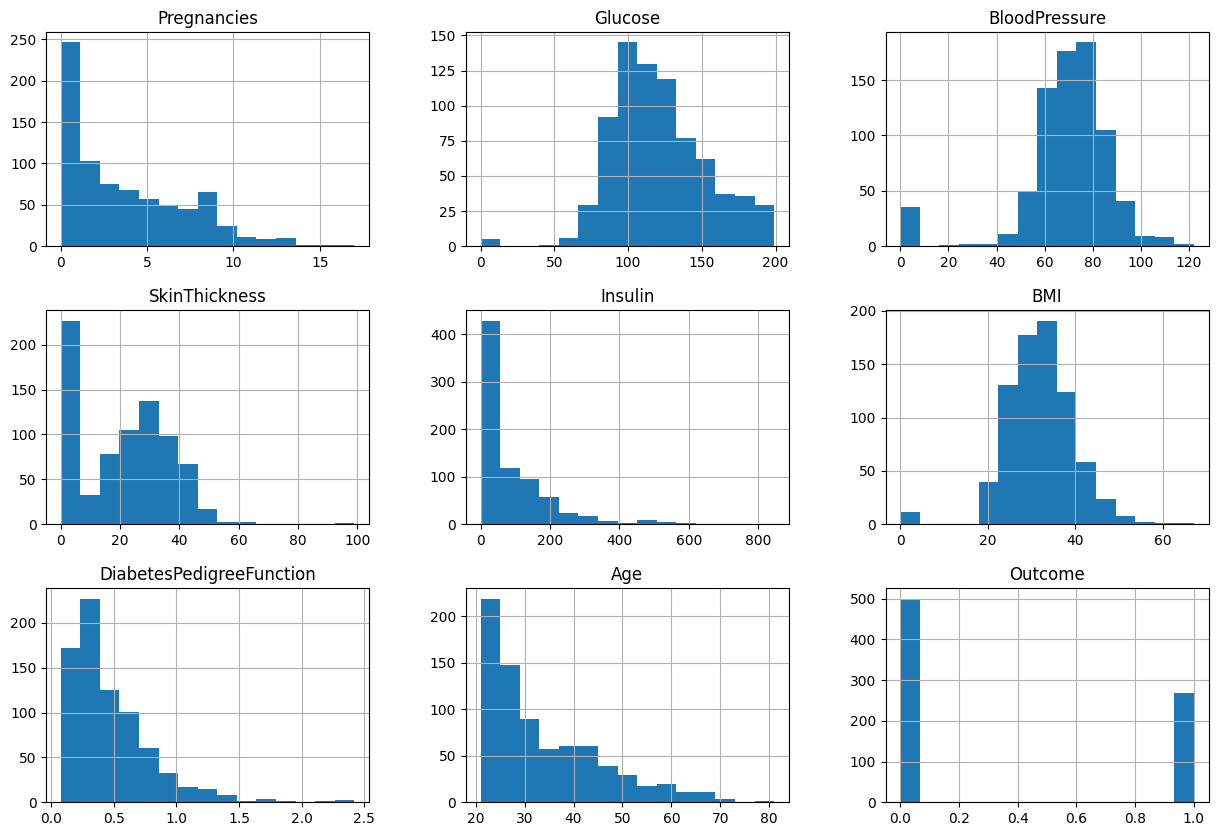

In [ ]:
# Plot histograms for all numerical attributes to visualize their distributions
data.hist(bins=15, figsize=(15, 10))
plt.show()

In [ ]:
# Key attributes such as glucose level (Glucose), BMI, and age (Age) show a strong correlation with the presence of diabetes (Outcome).
# This indicates that these factors have the most significant impact on the likelihood of developing diabetes.
# Other attributes, such as diastolic blood pressure (BloodPressure) and skinfold thickness (SkinThickness),
# show weaker correlations and may be less relevant in the context of diabetes prediction.

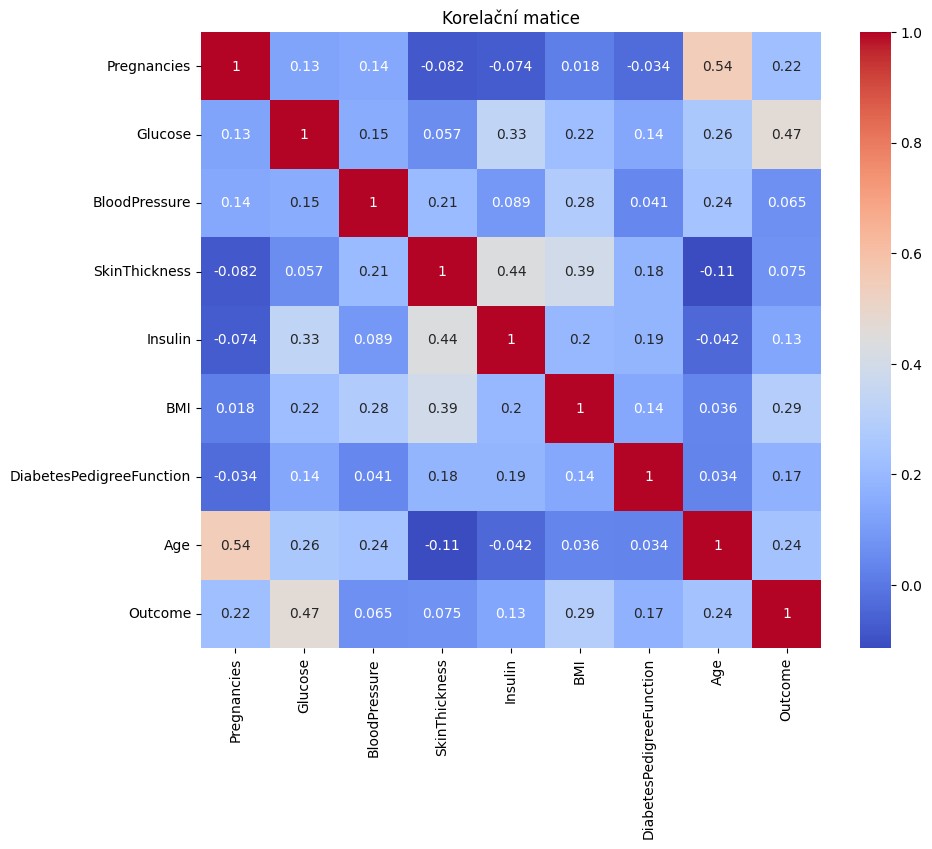

In [ ]:
# Correlation matrix heatmap
plt.figure(figsize=(10, 8))  # Set the figure size
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')  # Create heatmap with annotations and color mapping
plt.title("Correlation Matrix")  # Set the title of the plot
plt.show()  # Display the plot

In [ ]:
# Glucose level, Body Mass Index (BMI), and age are key features associated with the presence of diabetes,
# while other factors such as insulin level, blood pressure, and skinfold thickness show weaker influence
# and may require further analysis.


In [ ]:
# Split the dataset into input features (X) and target variable (y)
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Normalize the input features to improve model performance and convergence
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets (70% train, 30% test), with stratification to preserve class distribution
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)  # Predicted class labels
y_prob = model.predict_proba(X_test)[:, 1]  # Predicted probabilities for the positive class

# Evaluate model performance using a classification report (precision, recall, f1-score, etc.)
print("Classification Report:\n", classification_report(y_test, y_pred))


Klasifikační report:
               precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.52      0.59        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.74       231



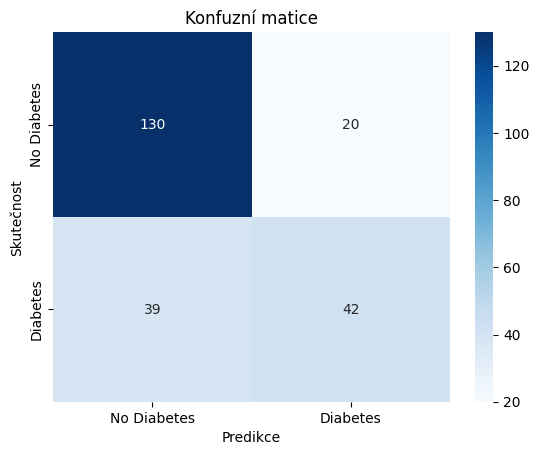

In [ ]:
# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Diabetes', 'Diabetes'],
            yticklabels=['No Diabetes', 'Diabetes'])

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()


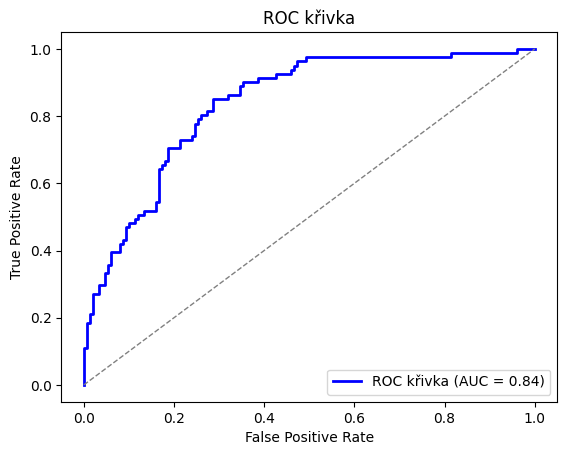

In [ ]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)  # Compute False Positive Rate and True Positive Rate
roc_auc = auc(fpr, tpr)  # Calculate the Area Under the Curve (AUC)

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')  # Plot ROC curve
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


In [ ]:
# To prevent diabetes, it is important to monitor key risk factors such as:

# - High blood glucose levels.
# - Overweight or obesity (high BMI).
# - Age, particularly individuals over 30–40 years old.

# Regular monitoring of glucose levels and BMI can help detect risk at early stages.
